## Imports

In [81]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

# Module # 1
## Data Aquisition and Preprocessing
## 1. Data Aquisition

In [60]:
with open("/Users/Z/OneDrive/Desktop/Data science/electronics.json") as f:
    data = json.load(f)
data

[{'Customer_ID': 'b81ee6c9-2ae4-48a7-b283-220eaa244f43',
  'Age': '40',
  'Gender': 'Female',
  'Income_Level': 'Medium',
  'Address': '43548 Murray Islands Suite 974\nAmyberg, CT 13457',
  'Transaction_ID': 'c6a6c712-e36b-406a-bfde-f53bdcf4744f',
  'Purchase_Date': '2022-04-26',
  'Product_ID': 'd2f767d6-b01a-41a2-87f7-ec1d1186f50e',
  'Product_Category': 'Clothing',
  'Brand': 'Brand_C',
  'Purchase_Amount': '193',
  'Average_Spending_Per_Purchase': '59',
  'Purchase_Frequency_Per_Month': '2',
  'Brand_Affinity_Score': '2',
  'Product_Category_Preferences': 'Low',
  'Month': '01',
  'Year': '2010',
  'Season': 'Winter'},
 {'Customer_ID': '',
  'Age': '25',
  'Gender': 'Male',
  'Income_Level': 'High',
  'Address': '',
  'Transaction_ID': '0b587838-1e4f-4231-b488-42bcd47c052a',
  'Purchase_Date': '2021-08-10',
  'Product_ID': '79eadc55-2de1-41cf-b1b6-40118c0bf8ec',
  'Product_Category': 'Books',
  'Brand': 'Brand_A',
  'Purchase_Amount': '318',
  'Average_Spending_Per_Purchase': '77',

### Convert JSON to Pandas Dataframe

In [61]:
df = pd.DataFrame(data)
df

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,,25,Male,High,,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,,70,Male,Medium,"566 Butler Turnpike\nPort Holly, OK 22329",776be313-5308-468e-a0ed-7409a4303364,2023-03-17,1802f115-80d8-48fd-ad97-94038fe31b82,Electronics,Brand_C,180,92,2,5,Medium,05,1987,Fall
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,176,53,3,3,Medium,09,1977,Winter
997,562cee08-f909-4e1c-a811-5711f967bea5,63,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,Hidden,8b6ffec8-de54-445c-90d0-1399858b2e16,Hidden,Brand_C,212,99,2,9,Low,12,1995,Summer
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,Hidden,98,8,7,Low,03,2000,


## 2. Data Cleaning

In [62]:
# Extracting Electronics data

#Select rows where category is not 'Electronics' and set those rows to NaN
df.loc[df['Product_Category'] != 'Electronics', :] = np.nan  
df.dropna(subset=['Product_Category'], inplace=True)
df.reset_index(drop=True, inplace=True)
df


,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,,1995,Winter
1,2e74b84d-d06c-4920-a3a9-38e4a11e8da8,54,Male,High,"8072 Dean Bypass Suite 774\nChloebury, AL 01960",4c45da65-bd62-486e-aeff-31f8959e0987,2023-06-03,e47f58c8-c6e9-40ed-9ce8-31af73b91fb5,Electronics,Brand_B,272,18,10,3,Medium,04,2019,Winter
2,309ab6ee-9364-4a64-9785-77717415ed5f,22,Male,High,"80014 Ayers Extension Apt. 361\nSmithtown, WY ...",62001db5-24fa-49d8-b570-928124a181d9,2022-01-07,b66cae99-a5b0-4ca9-9aff-6f57ff1bf421,Electronics,,241,26,8,5,Hidden,09,1978,Summer
3,ffb65cd7-4329-4abb-b076-05eb7cf933e0,68,Female,,"7417 Gregory Garden\nJordanborough, MT 88106",27a18611-855f-4db3-ad4e-77b008695f09,2022-06-25,,Electronics,Brand_B,115,31,4,4,Low,10,1972,Summer
4,34f7ac8d-fd91-4813-bf4d-e7b18264e442,73,Female,High,"12604 Mcdowell Canyon\nNew Angelview, TN 16808",b6c5589a-483a-403f-9cf2-b0ae77b15fbf,2021-11-27,70729d29-d37a-4bda-9081-c49d9dd47f30,Electronics,Brand_C,370,13,2,8,High,05,1991,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,ae452c82-be49-4f19-a735-5508e05eb37d,50,Male,Medium,"0587 Roger Village Suite 169\nEast Meganton, D...",320e2200-fd01-4137-9cda-4131bf469c1b,2022-07-17,d7a7e74a-bc19-4b4f-b8c8-60ce07797a4c,Electronics,Brand_B,39,38,7,10,High,03,2004,Fall
351,0a4d6275-f4c9-479d-848e-9ae19eb136fc,38,Other,High,Unit 7320 Box 3586\nDPO AA 76845,d9f9dd67-3826-46ac-aab8-64fb8f7d636d,2020-12-08,002c5e15-47ab-452a-aa2e-b03146bc9462,Electronics,Brand_B,287,19,6,3,Medium,11,,Spring
352,62c73378-cfbf-4896-9243-61de7de9acc7,37,Female,Low,"91116 Bradley Islands\nWest Meghan, PR 35083",adf48b82-b240-4827-b03a-c8d37a8d3e4c,2020-10-05,3ce3fd4f-4a0e-4c99-abbe-a4926ad76e9e,Electronics,Brand_A,222,,1,10,High,,2011,Summer
353,53c5fb01-3ee3-4cad-beab-fcfa3c03bfe3,57,Male,Medium,"7406 Pugh Roads Apt. 254\nBeardfurt, MA 17468",16642cb2-49d1-43ee-a37e-0c59a14bfc50,2022-08-25,41cf36ca-c19d-4fee-b894-68b5afcf186d,Electronics,Brand_C,127,59,10,8,Low,05,1990,Fall


In [63]:
# Find occurrences of "NaT", "Hidden," "Null," "NaN"
na_values = ["NaT", "Hidden", "Null", "NaN", ""]
count_na_values = (df.isin(na_values)).sum()

count_na_values


Customer_ID                      13
Age                              12
Gender                           13
Income_Level                     18
Address                          17
Transaction_ID                   13
Purchase_Date                    20
Product_ID                       13
Product_Category                  0
Brand                            24
Purchase_Amount                  17
Average_Spending_Per_Purchase     9
Purchase_Frequency_Per_Month     28
Brand_Affinity_Score             27
Product_Category_Preferences     15
Month                            26
Year                             15
Season                           12
dtype: int64

In [64]:
#Replace Empty Strings with NaN
columns=["Customer_ID","Age","Gender","Income_Level","Address","Transaction_ID","Purchase_Date","Product_ID","Brand","Purchase_Amount","Average_Spending_Per_Purchase","Purchase_Frequency_Per_Month","Brand_Affinity_Score","Product_Category_Preferences","Month","Year","Season"]
na_values = ["NaT", "Hidden", "Null", "NaN", ""]

for column in columns:
    df[column].replace(na_values, np.nan, inplace=True)

#Drop rows from these Columns
columns_to_check = ['Customer_ID', 'Transaction_ID', 'Address', 'Product_ID']
df.dropna(subset=columns_to_check, how='any', inplace=True)
df.reset_index(drop=True, inplace=True)

df

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,NaN,1995,Winter
1,2e74b84d-d06c-4920-a3a9-38e4a11e8da8,54,Male,High,"8072 Dean Bypass Suite 774\nChloebury, AL 01960",4c45da65-bd62-486e-aeff-31f8959e0987,2023-06-03,e47f58c8-c6e9-40ed-9ce8-31af73b91fb5,Electronics,Brand_B,272,18,10,3,Medium,04,2019,Winter
2,309ab6ee-9364-4a64-9785-77717415ed5f,22,Male,High,"80014 Ayers Extension Apt. 361\nSmithtown, WY ...",62001db5-24fa-49d8-b570-928124a181d9,2022-01-07,b66cae99-a5b0-4ca9-9aff-6f57ff1bf421,Electronics,NaN,241,26,8,5,NaN,09,1978,Summer
3,34f7ac8d-fd91-4813-bf4d-e7b18264e442,73,Female,High,"12604 Mcdowell Canyon\nNew Angelview, TN 16808",b6c5589a-483a-403f-9cf2-b0ae77b15fbf,2021-11-27,70729d29-d37a-4bda-9081-c49d9dd47f30,Electronics,Brand_C,370,13,2,8,High,05,1991,Summer
4,0d187b13-1a29-4421-ae2c-c0c378cc8910,19,Male,Medium,"595 Friedman Tunnel\nLake Jorgetown, NM 14564",58740f61-e34e-4fa6-a72e-a0052e39650d,2022-04-05,20d9b5b4-f26d-4442-ac20-a1d384cd0bc4,Electronics,Brand_B,485,38,NaN,5,Low,08,NaN,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,ad94ad53-31a3-4223-b900-1fe5239aac1d,59,Male,Medium,USNV Torres\nFPO AE 94176,f519cd98-eca9-4b22-acf0-d97b1cfa86c7,2023-04-01,066533db-c0c7-4964-81dd-acbe0c74e177,Electronics,Brand_C,13,45,4,5,High,10,1989,Spring
297,ae452c82-be49-4f19-a735-5508e05eb37d,50,Male,Medium,"0587 Roger Village Suite 169\nEast Meganton, D...",320e2200-fd01-4137-9cda-4131bf469c1b,2022-07-17,d7a7e74a-bc19-4b4f-b8c8-60ce07797a4c,Electronics,Brand_B,39,38,7,10,High,03,2004,Fall
298,0a4d6275-f4c9-479d-848e-9ae19eb136fc,38,Other,High,Unit 7320 Box 3586\nDPO AA 76845,d9f9dd67-3826-46ac-aab8-64fb8f7d636d,2020-12-08,002c5e15-47ab-452a-aa2e-b03146bc9462,Electronics,Brand_B,287,19,6,3,Medium,11,NaN,Spring
299,62c73378-cfbf-4896-9243-61de7de9acc7,37,Female,Low,"91116 Bradley Islands\nWest Meghan, PR 35083",adf48b82-b240-4827-b03a-c8d37a8d3e4c,2020-10-05,3ce3fd4f-4a0e-4c99-abbe-a4926ad76e9e,Electronics,Brand_A,222,NaN,1,10,High,NaN,2011,Summer


In [65]:
#Clean Numeric data
numeric_columns = ['Purchase_Amount', 'Purchase_Frequency_Per_Month',
                    'Age', 'Brand_Affinity_Score', 'Average_Spending_Per_Purchase', 'Year', 'Month']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

df['Purchase_Amount'].fillna(df['Purchase_Amount'].median(), inplace=True)
df['Average_Spending_Per_Purchase'].fillna(df['Average_Spending_Per_Purchase'].mean(), inplace=True)
df['Purchase_Frequency_Per_Month'].fillna(df['Purchase_Frequency_Per_Month'].mean(), inplace=True)
df['Brand_Affinity_Score'].fillna(df['Brand_Affinity_Score'].mean(), inplace=True)
df['Year'].fillna(df['Year'].mode().iloc[0], inplace=True)
df['Month'].fillna(df['Month'].mode().iloc[0], inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)

#Convert float values to integers
df['Purchase_Amount'] = df['Purchase_Amount'].astype(int)
df['Average_Spending_Per_Purchase'] = df['Average_Spending_Per_Purchase'].astype(int)
df['Purchase_Frequency_Per_Month'] = df['Purchase_Frequency_Per_Month'].astype(int)
df['Brand_Affinity_Score'] = df['Brand_Affinity_Score'].astype(int)
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Age'] = df['Age'].astype(int)

df


,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,5,1995,Winter
1,2e74b84d-d06c-4920-a3a9-38e4a11e8da8,54,Male,High,"8072 Dean Bypass Suite 774\nChloebury, AL 01960",4c45da65-bd62-486e-aeff-31f8959e0987,2023-06-03,e47f58c8-c6e9-40ed-9ce8-31af73b91fb5,Electronics,Brand_B,272,18,10,3,Medium,4,2019,Winter
2,309ab6ee-9364-4a64-9785-77717415ed5f,22,Male,High,"80014 Ayers Extension Apt. 361\nSmithtown, WY ...",62001db5-24fa-49d8-b570-928124a181d9,2022-01-07,b66cae99-a5b0-4ca9-9aff-6f57ff1bf421,Electronics,NaN,241,26,8,5,NaN,9,1978,Summer
3,34f7ac8d-fd91-4813-bf4d-e7b18264e442,73,Female,High,"12604 Mcdowell Canyon\nNew Angelview, TN 16808",b6c5589a-483a-403f-9cf2-b0ae77b15fbf,2021-11-27,70729d29-d37a-4bda-9081-c49d9dd47f30,Electronics,Brand_C,370,13,2,8,High,5,1991,Summer
4,0d187b13-1a29-4421-ae2c-c0c378cc8910,19,Male,Medium,"595 Friedman Tunnel\nLake Jorgetown, NM 14564",58740f61-e34e-4fa6-a72e-a0052e39650d,2022-04-05,20d9b5b4-f26d-4442-ac20-a1d384cd0bc4,Electronics,Brand_B,485,38,5,5,Low,8,1990,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,ad94ad53-31a3-4223-b900-1fe5239aac1d,59,Male,Medium,USNV Torres\nFPO AE 94176,f519cd98-eca9-4b22-acf0-d97b1cfa86c7,2023-04-01,066533db-c0c7-4964-81dd-acbe0c74e177,Electronics,Brand_C,13,45,4,5,High,10,1989,Spring
297,ae452c82-be49-4f19-a735-5508e05eb37d,50,Male,Medium,"0587 Roger Village Suite 169\nEast Meganton, D...",320e2200-fd01-4137-9cda-4131bf469c1b,2022-07-17,d7a7e74a-bc19-4b4f-b8c8-60ce07797a4c,Electronics,Brand_B,39,38,7,10,High,3,2004,Fall
298,0a4d6275-f4c9-479d-848e-9ae19eb136fc,38,Other,High,Unit 7320 Box 3586\nDPO AA 76845,d9f9dd67-3826-46ac-aab8-64fb8f7d636d,2020-12-08,002c5e15-47ab-452a-aa2e-b03146bc9462,Electronics,Brand_B,287,19,6,3,Medium,11,1990,Spring
299,62c73378-cfbf-4896-9243-61de7de9acc7,37,Female,Low,"91116 Bradley Islands\nWest Meghan, PR 35083",adf48b82-b240-4827-b03a-c8d37a8d3e4c,2020-10-05,3ce3fd4f-4a0e-4c99-abbe-a4926ad76e9e,Electronics,Brand_A,222,49,1,10,High,5,2011,Summer


In [66]:
#Clean Non-numeric data
non_numeric_columns = ['Gender', 'Income_Level', 'Purchase_Date', 'Product_Category', 'Brand', 'Season','Product_Category_Preferences']
for column in non_numeric_columns:
    df[column].fillna(df[column].mode().iloc[0], inplace=True)

df

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,5,1995,Winter
1,2e74b84d-d06c-4920-a3a9-38e4a11e8da8,54,Male,High,"8072 Dean Bypass Suite 774\nChloebury, AL 01960",4c45da65-bd62-486e-aeff-31f8959e0987,2023-06-03,e47f58c8-c6e9-40ed-9ce8-31af73b91fb5,Electronics,Brand_B,272,18,10,3,Medium,4,2019,Winter
2,309ab6ee-9364-4a64-9785-77717415ed5f,22,Male,High,"80014 Ayers Extension Apt. 361\nSmithtown, WY ...",62001db5-24fa-49d8-b570-928124a181d9,2022-01-07,b66cae99-a5b0-4ca9-9aff-6f57ff1bf421,Electronics,Brand_C,241,26,8,5,Medium,9,1978,Summer
3,34f7ac8d-fd91-4813-bf4d-e7b18264e442,73,Female,High,"12604 Mcdowell Canyon\nNew Angelview, TN 16808",b6c5589a-483a-403f-9cf2-b0ae77b15fbf,2021-11-27,70729d29-d37a-4bda-9081-c49d9dd47f30,Electronics,Brand_C,370,13,2,8,High,5,1991,Summer
4,0d187b13-1a29-4421-ae2c-c0c378cc8910,19,Male,Medium,"595 Friedman Tunnel\nLake Jorgetown, NM 14564",58740f61-e34e-4fa6-a72e-a0052e39650d,2022-04-05,20d9b5b4-f26d-4442-ac20-a1d384cd0bc4,Electronics,Brand_B,485,38,5,5,Low,8,1990,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,ad94ad53-31a3-4223-b900-1fe5239aac1d,59,Male,Medium,USNV Torres\nFPO AE 94176,f519cd98-eca9-4b22-acf0-d97b1cfa86c7,2023-04-01,066533db-c0c7-4964-81dd-acbe0c74e177,Electronics,Brand_C,13,45,4,5,High,10,1989,Spring
297,ae452c82-be49-4f19-a735-5508e05eb37d,50,Male,Medium,"0587 Roger Village Suite 169\nEast Meganton, D...",320e2200-fd01-4137-9cda-4131bf469c1b,2022-07-17,d7a7e74a-bc19-4b4f-b8c8-60ce07797a4c,Electronics,Brand_B,39,38,7,10,High,3,2004,Fall
298,0a4d6275-f4c9-479d-848e-9ae19eb136fc,38,Other,High,Unit 7320 Box 3586\nDPO AA 76845,d9f9dd67-3826-46ac-aab8-64fb8f7d636d,2020-12-08,002c5e15-47ab-452a-aa2e-b03146bc9462,Electronics,Brand_B,287,19,6,3,Medium,11,1990,Spring
299,62c73378-cfbf-4896-9243-61de7de9acc7,37,Female,Low,"91116 Bradley Islands\nWest Meghan, PR 35083",adf48b82-b240-4827-b03a-c8d37a8d3e4c,2020-10-05,3ce3fd4f-4a0e-4c99-abbe-a4926ad76e9e,Electronics,Brand_A,222,49,1,10,High,5,2011,Summer


In [67]:
# Z-score method to remove outliers
z_scores = stats.zscore(df[numeric_columns])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)
outliers

0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 301, dtype: bool

## 3. Data Transformation

In [68]:
#Overall Spendinf of a customer
df['Total_Spending'] = df['Average_Spending_Per_Purchase'] * df['Purchase_Frequency_Per_Month']

#Create a brand preference index
df['Brand_Preference_Index'] = df['Brand_Affinity_Score'] * df['Total_Spending']

#Count the number of unique product categories a customer has purchased
df['Product_Category_Diversity'] = df.groupby('Customer_ID')['Product_Category'].transform('nunique')

#Product category with the highest spending for each customer
preferred_category = df.groupby('Customer_ID')['Purchase_Amount'].idxmax()
df['Preferred_Product_Category'] = df.loc[preferred_category, 'Product_Category']

#Average Spending per Category
df['Average_Spending_Per_Category'] = df.groupby('Product_Category')['Purchase_Amount'].transform('mean')

# Merge new features into the existing DataFrame
df[['Total_Spending', 'Brand_Preference_Index', 'Product_Category_Diversity', 'Preferred_Product_Category', 'Average_Spending_Per_Category']]


df['Total_Spending'] = df['Total_Spending'].astype(int)
df['Brand_Preference_Index'] = df['Brand_Preference_Index'].astype(int)
df['Product_Category_Diversity'] = df['Product_Category_Diversity'].astype(int)
df['Average_Spending_Per_Category'] = df['Average_Spending_Per_Category'].astype(int)

df

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,...,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Total_Spending,Brand_Preference_Index,Product_Category_Diversity,Preferred_Product_Category,Average_Spending_Per_Category
0,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,...,1,Low,5,1995,Winter,900,900,1,Electronics,234
1,2e74b84d-d06c-4920-a3a9-38e4a11e8da8,54,Male,High,"8072 Dean Bypass Suite 774\nChloebury, AL 01960",4c45da65-bd62-486e-aeff-31f8959e0987,2023-06-03,e47f58c8-c6e9-40ed-9ce8-31af73b91fb5,Electronics,Brand_B,...,3,Medium,4,2019,Winter,180,540,1,Electronics,234
2,309ab6ee-9364-4a64-9785-77717415ed5f,22,Male,High,"80014 Ayers Extension Apt. 361\nSmithtown, WY ...",62001db5-24fa-49d8-b570-928124a181d9,2022-01-07,b66cae99-a5b0-4ca9-9aff-6f57ff1bf421,Electronics,Brand_C,...,5,Medium,9,1978,Summer,208,1040,1,Electronics,234
3,34f7ac8d-fd91-4813-bf4d-e7b18264e442,73,Female,High,"12604 Mcdowell Canyon\nNew Angelview, TN 16808",b6c5589a-483a-403f-9cf2-b0ae77b15fbf,2021-11-27,70729d29-d37a-4bda-9081-c49d9dd47f30,Electronics,Brand_C,...,8,High,5,1991,Summer,26,208,1,Electronics,234
4,0d187b13-1a29-4421-ae2c-c0c378cc8910,19,Male,Medium,"595 Friedman Tunnel\nLake Jorgetown, NM 14564",58740f61-e34e-4fa6-a72e-a0052e39650d,2022-04-05,20d9b5b4-f26d-4442-ac20-a1d384cd0bc4,Electronics,Brand_B,...,5,Low,8,1990,Summer,190,950,1,Electronics,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,ad94ad53-31a3-4223-b900-1fe5239aac1d,59,Male,Medium,USNV Torres\nFPO AE 94176,f519cd98-eca9-4b22-acf0-d97b1cfa86c7,2023-04-01,066533db-c0c7-4964-81dd-acbe0c74e177,Electronics,Brand_C,...,5,High,10,1989,Spring,180,900,1,Electronics,234
297,ae452c82-be49-4f19-a735-5508e05eb37d,50,Male,Medium,"0587 Roger Village Suite 169\nEast Meganton, D...",320e2200-fd01-4137-9cda-4131bf469c1b,2022-07-17,d7a7e74a-bc19-4b4f-b8c8-60ce07797a4c,Electronics,Brand_B,...,10,High,3,2004,Fall,266,2660,1,Electronics,234
298,0a4d6275-f4c9-479d-848e-9ae19eb136fc,38,Other,High,Unit 7320 Box 3586\nDPO AA 76845,d9f9dd67-3826-46ac-aab8-64fb8f7d636d,2020-12-08,002c5e15-47ab-452a-aa2e-b03146bc9462,Electronics,Brand_B,...,3,Medium,11,1990,Spring,114,342,1,Electronics,234
299,62c73378-cfbf-4896-9243-61de7de9acc7,37,Female,Low,"91116 Bradley Islands\nWest Meghan, PR 35083",adf48b82-b240-4827-b03a-c8d37a8d3e4c,2020-10-05,3ce3fd4f-4a0e-4c99-abbe-a4926ad76e9e,Electronics,Brand_A,...,10,High,5,2011,Summer,49,490,1,Electronics,234


In [82]:
numeric_columns = ['Purchase_Amount', 'Purchase_Frequency_Per_Month',
                    'Age', 'Brand_Affinity_Score', 'Average_Spending_Per_Purchase', 'Year', 'Month', 'Total_Spending', 'Brand_Preference_Index']

numeric_features = df[numeric_columns]
scaler = MinMaxScaler()

# Fit and transform the numeric features
numeric_features_normalized = scaler.fit_transform(numeric_features)

df_normalized = pd.DataFrame(numeric_features_normalized, columns=numeric_columns)
df_normalized.head()

,Purchase_Amount,Purchase_Frequency_Per_Month,Age,Brand_Affinity_Score,Average_Spending_Per_Purchase,Year,Month,Total_Spending,Brand_Preference_Index
0,0.384774,0.888889,0.629032,0.000000,1.000000,0.471698,0.363636,0.908629,0.091099
1,0.539095,1.000000,0.580645,0.222222,0.136842,0.924528,0.272727,0.177665,0.053489
2,0.475309,0.777778,0.064516,0.444444,0.221053,0.150943,0.727273,0.206091,0.105725
3,0.740741,0.111111,0.887097,0.777778,0.084211,0.396226,0.363636,0.021320,0.018805
4,0.977366,0.444444,0.016129,0.444444,0.347368,0.377358,0.636364,0.187817,0.096323


# Module # 2
## Exploratory Data Analysis(EDA)
## 1. Univariate Analysis

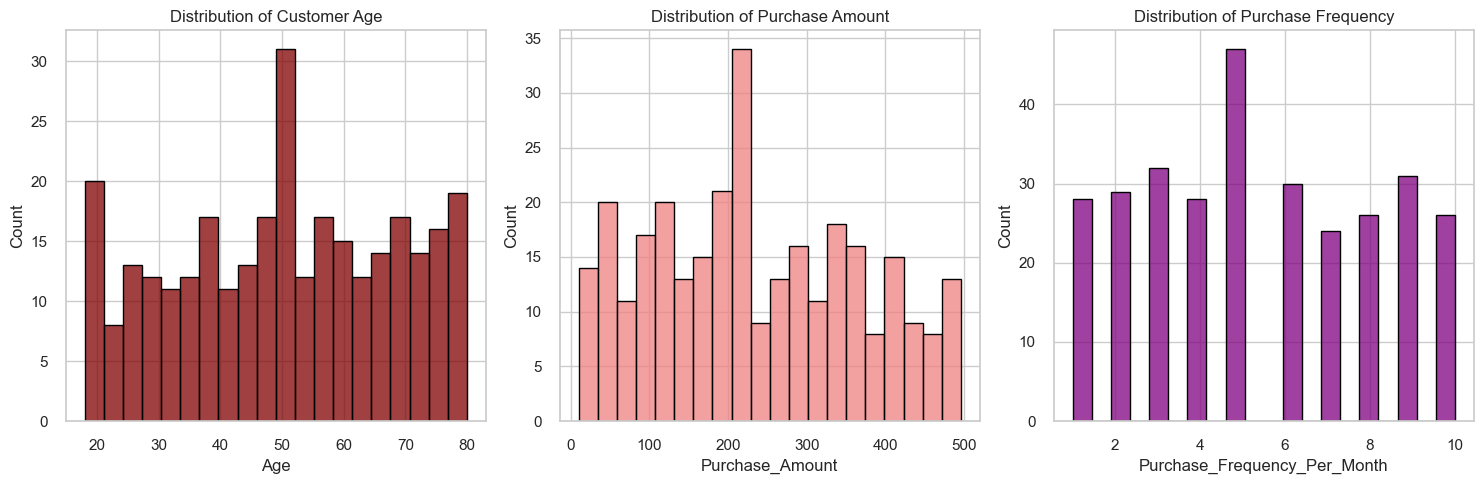

Descriptive Statistics:


,Age,Purchase_Amount,Purchase_Frequency_Per_Month
count,301.000000,301.000000,301.000000
mean,50.259136,234.046512,5.395349
std,17.709111,133.020316,2.783256
min,18.000000,10.000000,1.000000
25%,36.000000,122.000000,3.000000
50%,50.000000,220.000000,5.000000
75%,66.000000,343.000000,8.000000
max,80.000000,496.000000,10.000000


In [85]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))

# Histogram for customer age
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, color='Maroon', edgecolor = 'Black')
plt.title('Distribution of Customer Age')

# Boxplot for purchase amount
plt.subplot(1, 3, 2)
sns.histplot(df['Purchase_Amount'], bins=20, color='lightcoral', edgecolor = 'Black')
plt.title('Distribution of Purchase Amount')

# Histogram for purchase frequency
plt.subplot(1, 3, 3)
sns.histplot(df['Purchase_Frequency_Per_Month'], bins=20, color='Purple', edgecolor = 'Black')
plt.title('Distribution of Purchase Frequency')

plt.tight_layout()
plt.show()

#Descriptive Statistics
print("Descriptive Statistics:")
df[['Age', 'Purchase_Amount', 'Purchase_Frequency_Per_Month']].describe()

## 2. Bivariate Analysis

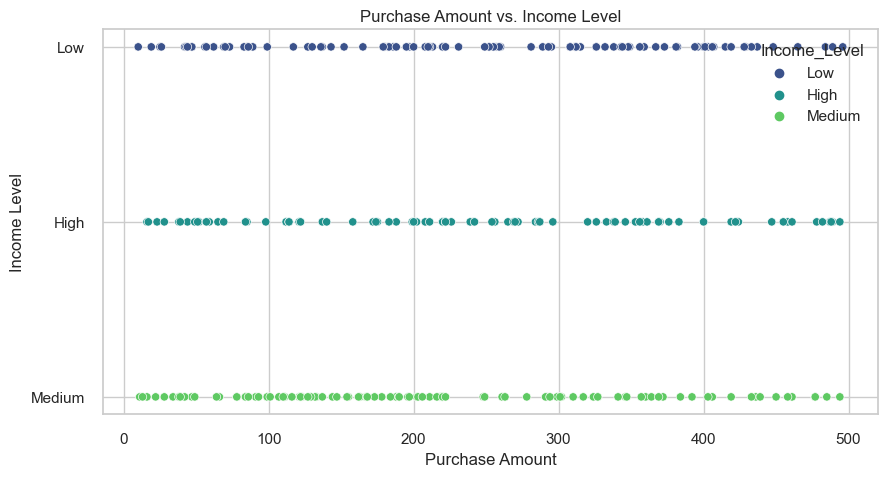

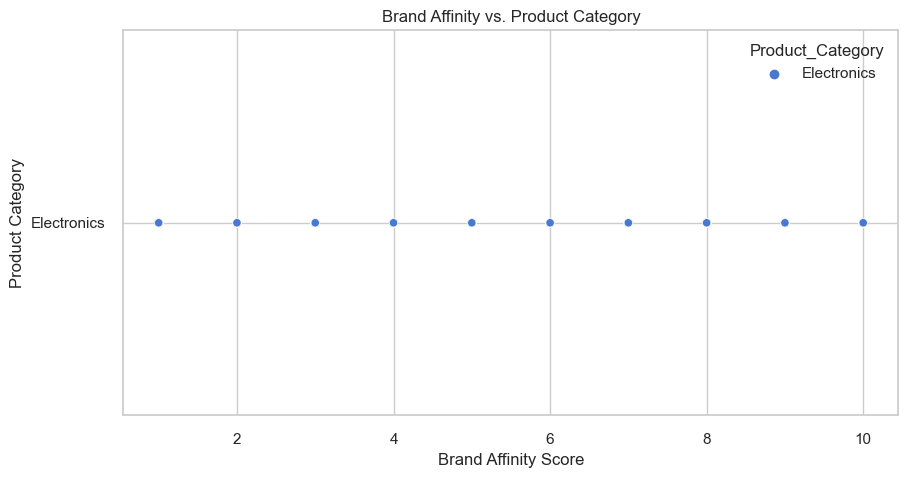

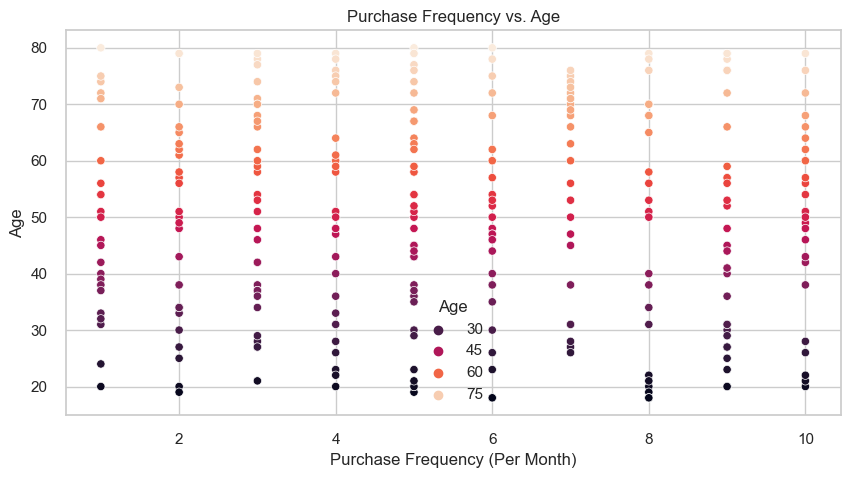

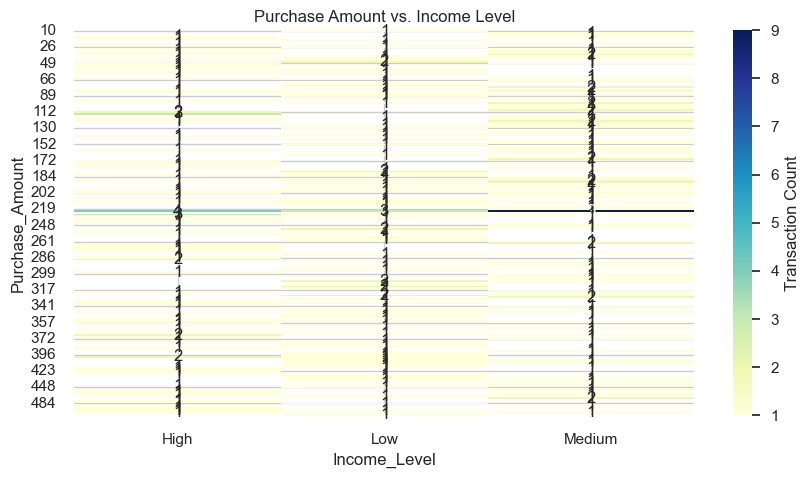

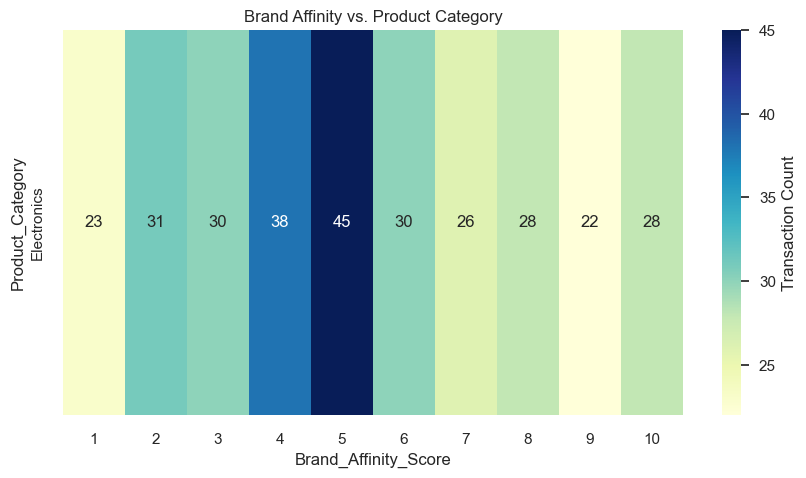

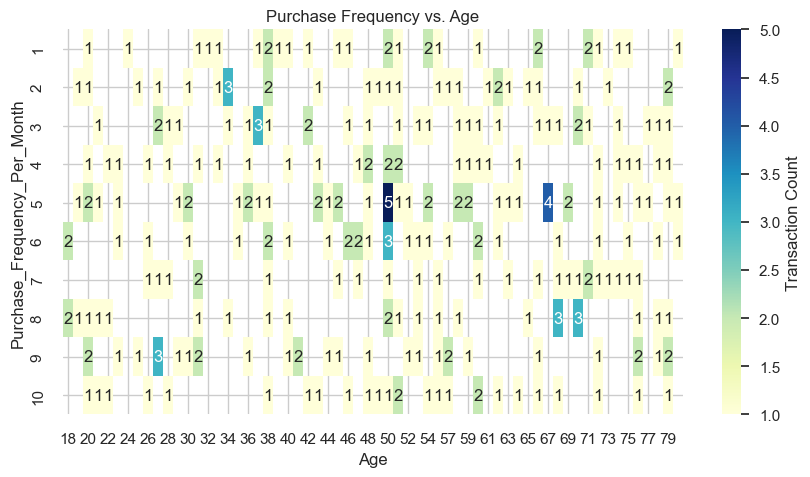

In [89]:
# Scatter Plot: Purchase Amount vs. Income Level
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Purchase_Amount', y='Income_Level', data=df, hue='Income_Level', palette='viridis')
plt.title('Purchase Amount vs. Income Level')
plt.xlabel('Purchase Amount')
plt.ylabel('Income Level')
plt.show()

# Scatter Plot: Brand Affinity vs. Product Category
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Brand_Affinity_Score', y='Product_Category', data=df, hue='Product_Category', palette='muted')
plt.title('Brand Affinity vs. Product Category')
plt.xlabel('Brand Affinity Score')
plt.ylabel('Product Category')
plt.show()

# Scatter Plot: Purchase Frequency vs. Age
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Purchase_Frequency_Per_Month', y='Age', data=df, hue='Age', palette='rocket')
plt.title('Purchase Frequency vs. Age')
plt.xlabel('Purchase Frequency (Per Month)')
plt.ylabel('Age')
plt.show()

# Heatmap: Purchase Amount vs. Income Level
plt.figure(figsize=(10, 5))
heatmap_data = df.pivot_table(index='Purchase_Amount', columns='Income_Level', values='Transaction_ID', aggfunc='count')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt="g", cbar_kws={'label': 'Transaction Count'})
plt.title('Purchase Amount vs. Income Level')
plt.show()

# Heatmap: Brand Affinity vs. Product Category
plt.figure(figsize=(10, 5))
heatmap_data = df.pivot_table(index='Product_Category', columns='Brand_Affinity_Score', values='Transaction_ID', aggfunc='count')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt="g", cbar_kws={'label': 'Transaction Count'})
plt.title('Brand Affinity vs. Product Category')
plt.show()

# Heatmap: Purchase Frequency vs. Age
plt.figure(figsize=(10, 5))
heatmap_data = df.pivot_table(index='Purchase_Frequency_Per_Month', columns='Age', values='Transaction_ID', aggfunc='count')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt="g", cbar_kws={'label': 'Transaction Count'})
plt.title('Purchase Frequency vs. Age')
plt.show()


## 3. Temporal Analysis

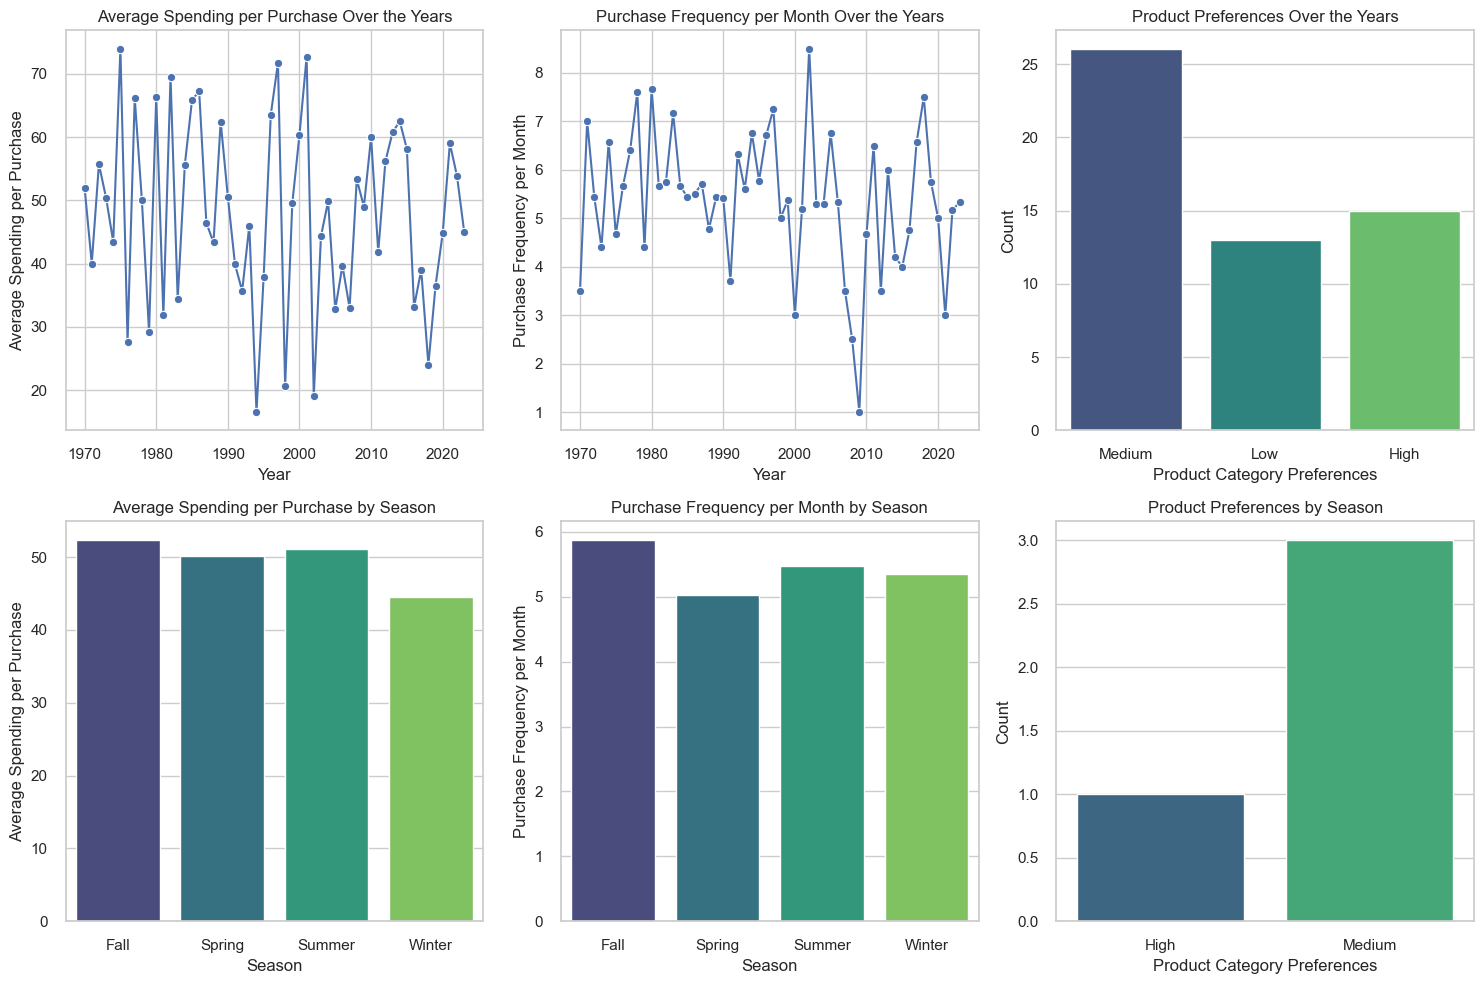

In [72]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Group data by 'Year' and calculate average spending, purchase frequency, and product preferences
trends_data = df.groupby('Year').agg({
    'Average_Spending_Per_Purchase': 'mean',
    'Purchase_Frequency_Per_Month': 'mean',
    'Product_Category_Preferences': lambda x: x.value_counts().idxmax()
}).reset_index()

# Line plot for Average Spending per Purchase over the years
plt.subplot(2, 3, 1)
sns.lineplot(x='Year', y='Average_Spending_Per_Purchase', data=trends_data, marker='o')
plt.title('Average Spending per Purchase Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Spending per Purchase')

# Line plot for Purchase Frequency per Month over the years
plt.subplot(2, 3, 2)
sns.lineplot(x='Year', y='Purchase_Frequency_Per_Month', data=trends_data, marker='o')
plt.title('Purchase Frequency per Month Over the Years')
plt.xlabel('Year')
plt.ylabel('Purchase Frequency per Month')

# Countplot for Product Preferences over the years
plt.subplot(2, 3, 3)
sns.countplot(x='Product_Category_Preferences', data=trends_data, palette='viridis')
plt.title('Product Preferences Over the Years')
plt.xlabel('Product Category Preferences')
plt.ylabel('Count')

# Group data by 'Season' and calculate average spending, purchase frequency, and product preferences
seasonal_data = df.groupby('Season').agg({
    'Average_Spending_Per_Purchase': 'mean',
    'Purchase_Frequency_Per_Month': 'mean',
    'Product_Category_Preferences': lambda x: x.value_counts().idxmax()
}).reset_index()

# Bar plot for Average Spending per Purchase by Season
plt.subplot(2, 3, 4)
sns.barplot(x='Season', y='Average_Spending_Per_Purchase', data=seasonal_data, palette='viridis')
plt.title('Average Spending per Purchase by Season')
plt.xlabel('Season')
plt.ylabel('Average Spending per Purchase')

# Bar plot for Purchase Frequency per Month by Season
plt.subplot(2, 3, 5)
sns.barplot(x='Season', y='Purchase_Frequency_Per_Month', data=seasonal_data, palette='viridis')
plt.title('Purchase Frequency per Month by Season')
plt.xlabel('Season')
plt.ylabel('Purchase Frequency per Month')

# Countplot for Product Preferences by Season
plt.subplot(2, 3, 6)
sns.countplot(x='Product_Category_Preferences', data=seasonal_data, palette='viridis')
plt.title('Product Preferences by Season')
plt.xlabel('Product Category Preferences')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


# Module # 3
## Clustering Analysis
## A. K-Means Clustering

C:\Users\Z\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Z\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Z\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Z\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

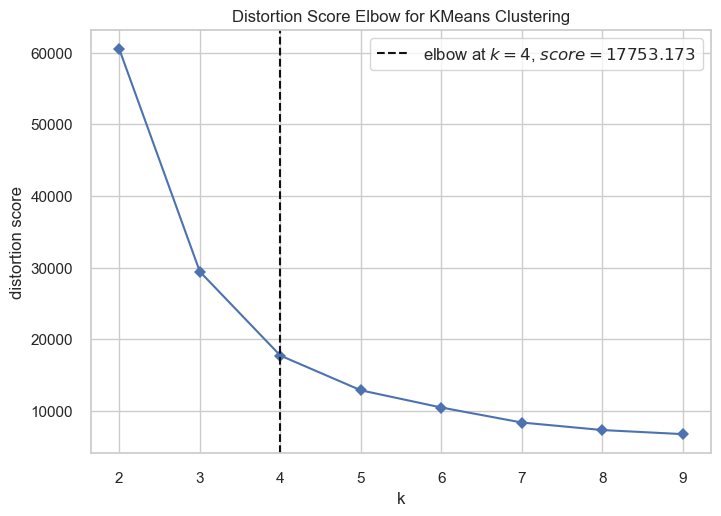

C:\Users\Z\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Z\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Z\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Z\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

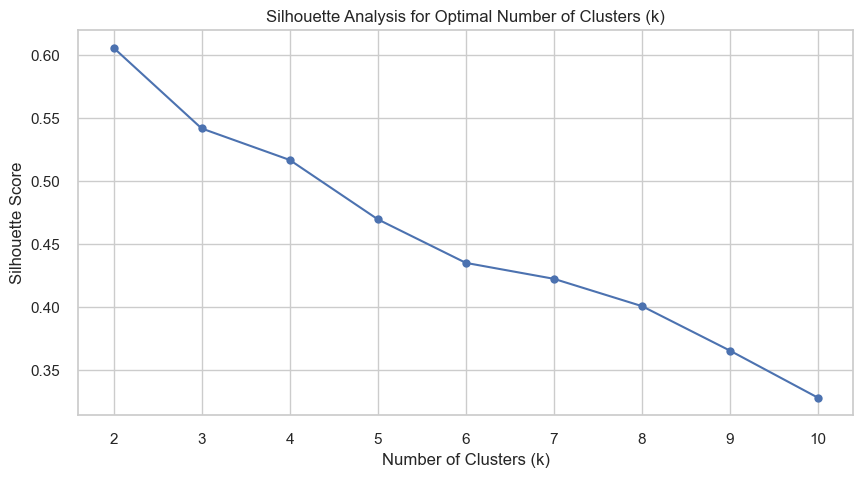

In [73]:
cluster_columns = ['Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']

X = df[cluster_columns]

# Step 1: Elbow Method to find cluster count
visualizer = KElbowVisualizer(KMeans(), k=(2, 10), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.show()

# Step 2: Silhouette Analysis to evaluate the quality of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


## B. DBSCAN Clustering

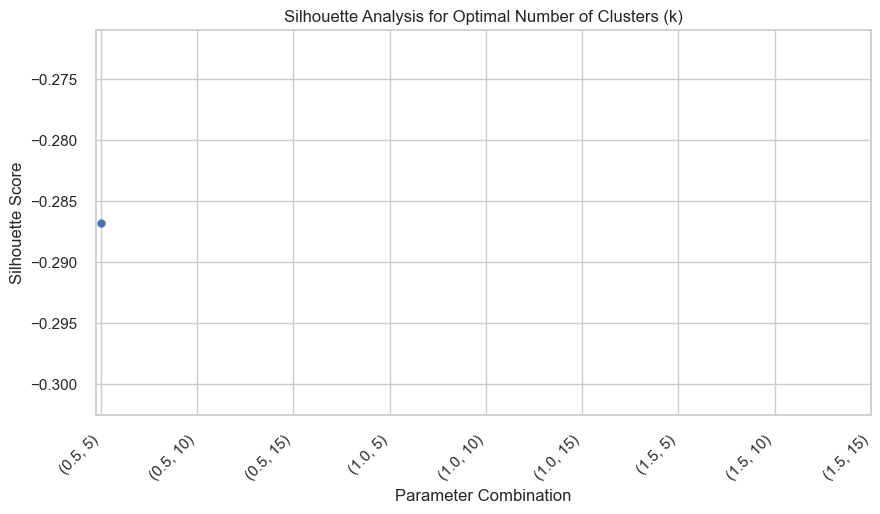

Cluster -1 - Size: 296
Cluster -1 - Density: 0.9833887043189369
Cluster 0 - Size: 5
Cluster 0 - Density: 0.016611295681063124


In [74]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Select relevant columns for clustering
cluster_columns = ['Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']
X = df[cluster_columns]

# Experiment with different values of eps and MinPts
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [5, 10, 15]

best_eps = eps_values[0]  # Initialize with the first value
best_min_samples = min_samples_values[0]  # Initialize with the first value
best_silhouette_score = -1

silhouette_scores = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X)

        # Check if there are at least two unique labels for silhouette score
        unique_labels = np.unique(cluster_labels)
        if len(unique_labels) < 2:
            continue

        # Evaluate cluster quality using silhouette score
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)

        # Check if the current combination is better than the previous best
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_eps = eps
            best_min_samples = min_samples

# Plot silhouette scores for different parameter combinations
plt.figure(figsize=(10, 5))
plt.plot(range(len(silhouette_scores)), silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal Number of Clusters (k)')
plt.xlabel('Parameter Combination')
plt.ylabel('Silhouette Score')
# Fix the x-axis ticks and labels
tick_labels = [f'({eps}, {min_samples})' for eps in eps_values for min_samples in min_samples_values]
plt.xticks(range(len(tick_labels)), tick_labels, rotation=45, ha="right")
plt.show()

# Apply DBSCAN with the chosen parameters
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
db_cluster_labels = best_dbscan.fit_predict(X)

# Explore cluster characteristics
unique_clusters = np.unique(db_cluster_labels)
for cluster in unique_clusters:
    cluster_points = X[db_cluster_labels == cluster]
    print(f"Cluster {cluster} - Size: {len(cluster_points)}")
    print(f"Cluster {cluster} - Density: {len(cluster_points) / len(X)}")


In [75]:
#Comparison

kmeans = KMeans(n_clusters=k)  
kmeans_cluster_labels = kmeans.fit_predict(X)

#Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(X, kmeans_cluster_labels)
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")

best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
db_cluster_labels = best_dbscan.fit_predict(X)

#Silhouette Score for DBSCAN
unique_db_clusters = np.unique(db_cluster_labels)
if len(unique_db_clusters) > 1:
    silhouette_dbscan = silhouette_score(X, db_cluster_labels)
    print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")
else:
    print("DBSCAN resulted in a single cluster. Silhouette score cannot be calculated.")

# Adjusted Rand Index for cluster similarity between K-Means and DBSCAN
ari = adjusted_rand_score(kmeans_cluster_labels, db_cluster_labels)
print(f"Adjusted Rand Index between K-Means and DBSCAN: {ari}")

C:\Users\Z\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for K-Means: 0.34008836501962947
Silhouette Score for DBSCAN: -0.2867789744852705
Adjusted Rand Index between K-Means and DBSCAN: -0.00362597595232067


## C. KMeans++ Clustering

C:\Users\Z\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'K-Means++ Clustering')

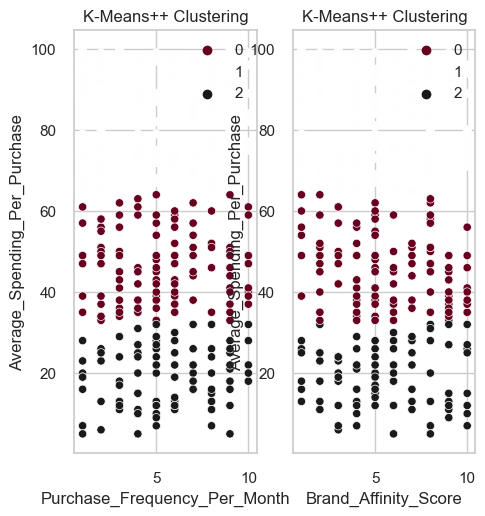

In [76]:
cluster_columns = ['Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Average_Spending_Per_Purchase']

X = df[cluster_columns]

num_clusters = 3

kmeans_pp = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
kmeans_pp_cluster_labels = kmeans_pp.fit_predict(X)

plt.subplot(1, 3, 1)
sns.scatterplot(x='Purchase_Frequency_Per_Month', y='Average_Spending_Per_Purchase', hue=kmeans_pp_cluster_labels, data=df, palette='RdGy')
plt.title('K-Means++ Clustering')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Brand_Affinity_Score', y='Average_Spending_Per_Purchase', hue=kmeans_pp_cluster_labels, data=df, palette='RdGy')
plt.title('K-Means++ Clustering')

Silhouette Score for DBSCAN: -0.2867789744852705
Silhouette Score for K-Means: 0.34008836501962947
Adjusted Rand Index: -0.00362597595232067


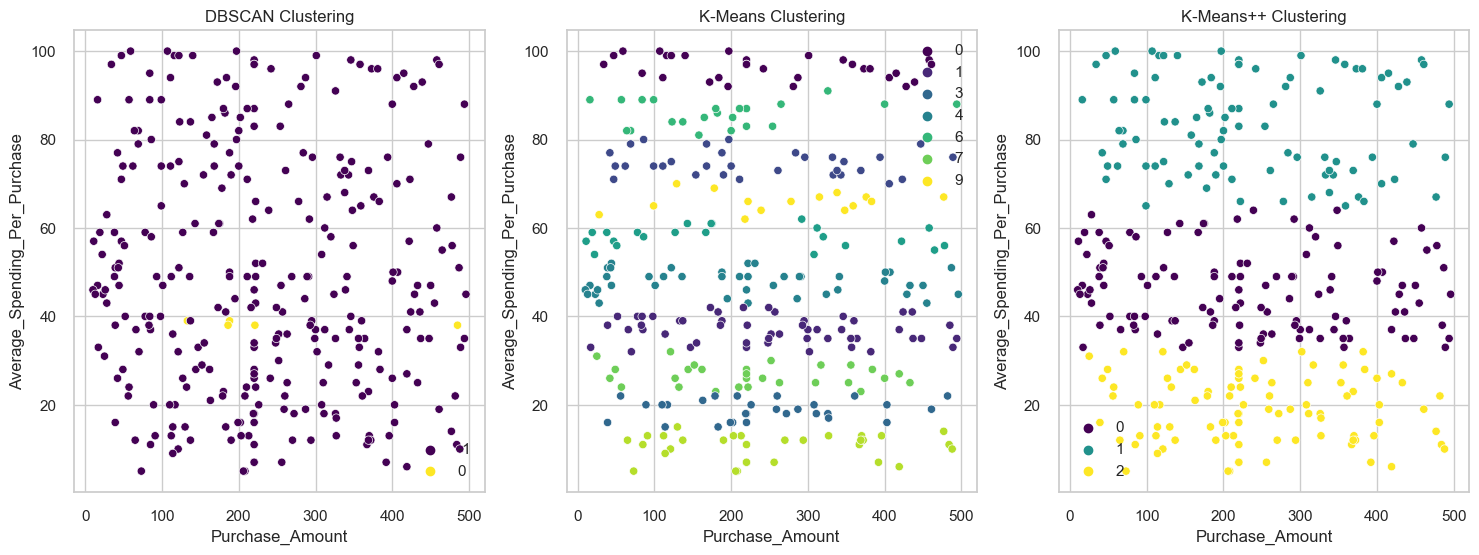

In [88]:
# Comparison
def compare_clusters(cluster_labels1, cluster_labels2):
    # Check if DBSCAN resulted in a single cluster
    unique_clusters_1 = np.unique(cluster_labels1)
    if len(unique_clusters_1) > 1:
        silhouette_score_1 = silhouette_score(X, cluster_labels1)
        print(f"Silhouette Score for DBSCAN: {silhouette_score_1}")
    else:
        print("DBSCAN resulted in a single cluster. Silhouette score cannot be calculated.")

    # Calculate Silhouette Score for K-Means
    silhouette_score_2 = silhouette_score(X, cluster_labels2)
    adjusted_rand_index = adjusted_rand_score(cluster_labels1, cluster_labels2)

    print(f"Silhouette Score for K-Means: {silhouette_score_2}")
    print(f"Adjusted Rand Index: {adjusted_rand_index}")

# DBSCAN
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
db_cluster_labels = best_dbscan.fit_predict(X)

# Compare results
compare_clusters(db_cluster_labels, kmeans_cluster_labels)

# Plotting
plt.figure(figsize=(18, 6))

# DBSCAN
plt.subplot(1, 3, 1)
sns.scatterplot(x='Purchase_Amount', y='Average_Spending_Per_Purchase', hue=db_cluster_labels, data=df, palette='viridis')
plt.title('DBSCAN Clustering')

# K-Means
plt.subplot(1, 3, 2)
sns.scatterplot(x='Purchase_Amount', y='Average_Spending_Per_Purchase', hue=kmeans_cluster_labels, data=df, palette='viridis')
plt.title('K-Means Clustering')

# K-Means++
plt.subplot(1, 3, 3)
sns.scatterplot(x='Purchase_Amount', y='Average_Spending_Per_Purchase', hue=kmeans_pp_cluster_labels, data=df, palette='viridis')
plt.title('K-Means++ Clustering')

plt.show()


In [78]:

# Evaluate K-Means
silhouette_kmeans = silhouette_score(X, kmeans_cluster_labels)
calinski_kmeans = calinski_harabasz_score(X, kmeans_cluster_labels)
davies_kmeans = davies_bouldin_score(X, kmeans_cluster_labels)

# Evaluate DBSCAN (check if there's more than one cluster)
if len(np.unique(db_cluster_labels)) > 1:
    silhouette_dbscan = silhouette_score(X, db_cluster_labels)
    calinski_dbscan = calinski_harabasz_score(X, db_cluster_labels)
    davies_dbscan = davies_bouldin_score(X, db_cluster_labels)
else:
    silhouette_dbscan, calinski_dbscan, davies_dbscan = np.nan, np.nan, np.nan

# Evaluate K-Means++
silhouette_kmeans_pp = silhouette_score(X, kmeans_pp_cluster_labels)
calinski_kmeans_pp = calinski_harabasz_score(X, kmeans_pp_cluster_labels)
davies_kmeans_pp = davies_bouldin_score(X, kmeans_pp_cluster_labels)

# Create a dictionary to store the results
results = {
    'K-Means': {
        'Silhouette Score': silhouette_kmeans,
        'Calinski-Harabasz Score': calinski_kmeans,
        'Davies-Bouldin Index': davies_kmeans
    },
    'DBSCAN': {
        'Silhouette Score': silhouette_dbscan,
        'Calinski-Harabasz Score': calinski_dbscan,
        'Davies-Bouldin Index': davies_dbscan
    },
    'K-Means++': {
        'Silhouette Score': silhouette_kmeans_pp,
        'Calinski-Harabasz Score': calinski_kmeans_pp,
        'Davies-Bouldin Index': davies_kmeans_pp
    }
}

for algorithm, scores in results.items():
    print(f"\nResults for {algorithm}:")
    for metric, value in scores.items():
        print(f"{metric}: {value}")

results_df = pd.DataFrame(results)
results_df



Results for K-Means:
Silhouette Score: 0.34008836501962947
Calinski-Harabasz Score: 1111.9415060741308
Davies-Bouldin Index: 0.93628264718633

Results for DBSCAN:
Silhouette Score: -0.2867789744852705
Calinski-Harabasz Score: 0.8283206928730784
Davies-Bouldin Index: 2.214052179863051

Results for K-Means++:
Silhouette Score: 0.5419992500309615
Calinski-Harabasz Score: 983.282272497345
Davies-Bouldin Index: 0.5729077328938527


,K-Means,DBSCAN,K-Means++
Silhouette Score,0.340088,-0.286779,0.541999
Calinski-Harabasz Score,1111.941506,0.828321,983.282272
Davies-Bouldin Index,0.936283,2.214052,0.572908
